## Forward Euler for solar system

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Reading data file

In [10]:
data = np.loadtxt('data.txt')

### Importing data to variables

In [11]:
m = data[:,0]                             # Mass
xi = data[:,1]                            # X position
yi = data[:,2]                            # Y Position
zi = data[:,3]                            # Z Position
vxi = data[:,4]                           # Velocity in X direction
vyi = data[:,5]                           # Velocity in Y direction
vzi = data[:,6]                           # Velocity in Z direction
t_max = 365000                            # Total time of integration
G = 2.95 * (10**-4)                       # Gravitational constants
delta =1                                  # Time steps that is 1 day
N = 365000                                # Define the number of elements in our matrices

In [12]:
#====================== Define arrays for storing answers ========================


#====================== Positions ======================
x = np.zeros((N,10),float)
y = np.zeros((N,10),float)
z = np.zeros((N,10),float)

#==================== Momentums and energies ========================
px = np.zeros((N,10),float)
py = np.zeros((N,10),float)
pz = np.zeros((N,10),float)
UE = np.zeros((N-1),float) 
KE = np.zeros((N-1),float)

#=================== Temporary arrays for storing measuremen in different time steps ===================
dx =np.zeros((10,10),float)
dy = np.zeros((10,10),float)
dz = np.zeros((10,10),float)
ux = np.zeros((10),float)
uy = np.zeros((10),float)
uz = np.zeros((10),float)
r = np.zeros((10,10),float)
ep = 1e-6                        # In order to prevent any singularities in denominator

### Define initial conditions

In [13]:
for i in range(10):
    x[0,i] = xi[i]
    y[0,i] = yi[i]
    z[0,i] = zi[i]
    px[0,i] = m[i]*vxi[i]
    py[0,i] = m[i]*vyi[i]
    pz[0,i] = m[i]*vzi[i]

### Main algorithm

In [14]:
for t in range(1,N):
    for k in range(10):
        ux[k] = uy[k] = uz[k] = UE[k] = KE[k] = 0
    for i in range(10):
        KE[t-1] = KE[t-1] + 0.5 * (px[t-1,i] * px[t-1,i] + py[t-1,i] * py[t-1,i] + pz[t-1,i] * pz[t-1,i])/m[i]
        for j in range(10):
            if(i != j):
                dx[i,j] = x[t-1,i]-x[t-1,j]
                dy[i,j] = y[t-1,i]-y[t-1,j]
                dz[i,j] = z[t-1,i]-z[t-1,j]
                r[i,j] = np.sqrt(dx[i,j]**2 + dy[i,j]**2 + dz[i,j]**2)
                UE[t-1]=UE[t-1] - G* m[i]*m[j] / (r[i,j]+ep)
    for i in range(10):
        for j in range(10):
            if(i != j):
                dx[i,j] = x[t-1,i]-x[t-1,j]
                dy[i,j] = y[t-1,i]-y[t-1,j]
                dz[i,j] = z[t-1,i]-z[t-1,j]
                r[i,j] = np.sqrt(dx[i,j]**2 + dy[i,j]**2 + dz[i,j]**2)
                ux[i] = ux[i]-G*m[i]*m[j]*dx[i,j]/((r[i,j]+ep)**3)
                uy[i] = uy[i]-G*m[i]*m[j]*dy[i,j]/((r[i,j]+ep)**3)
                uz[i] = uz[i]-G*m[i]*m[j]*dz[i,j]/((r[i,j]+ep)**3)
    for l in range(10):
            x[t,l] = x[t-1,l] + delta*px[t-1,l]/m[l]
            y[t,l] = y[t-1,l] + delta*py[t-1,l]/m[l]
            z[t,l] = z[t-1,l] + delta*pz[t-1,l]/m[l]
            px[t,l] = px[t-1,l] + delta*ux[l]
            py[t,l] = py[t-1,l] + delta*uy[l]
            pz[t,l] = pz[t-1,l] + delta*uz[l]

### Writing answers to new arrays

In [15]:
xsun = x[:,0];ysun = y[:,0];zsun = z[:,0];
xmer = x[:,1];ymer = y[:,1];zmer = z[:,1];
xven = x[:,2];yven = y[:,2];zven = z[:,2];
xear = x[:,3];year = y[:,3];zear = z[:,3];
xmar = x[:,4];ymar = y[:,4];zmar = z[:,4];
xjup = x[:,5];yjup = y[:,5];zjup = z[:,5];
xsat = x[:,6];ysat = y[:,6];zsat = z[:,6];
xura = x[:,7];yura = y[:,7];zura = z[:,7];  
xnep = x[:,8];ynep = y[:,8];znep = z[:,8];                                     
xplo = x[:,9];yplo = y[:,9];zplo = z[:,9];

### Define time and total energy of the system

In [22]:
time = np.arange(N-1)
H_Forward_Euler = np.zeros((N-1),float)

In [23]:
for i in range(0,N-1):
    H_Forward_Euler[i] = UE[i] + KE[i]

In [24]:
datafile_path = "./H-FEuler.txt"
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, H_Forward_Euler)

### Plot the total energy

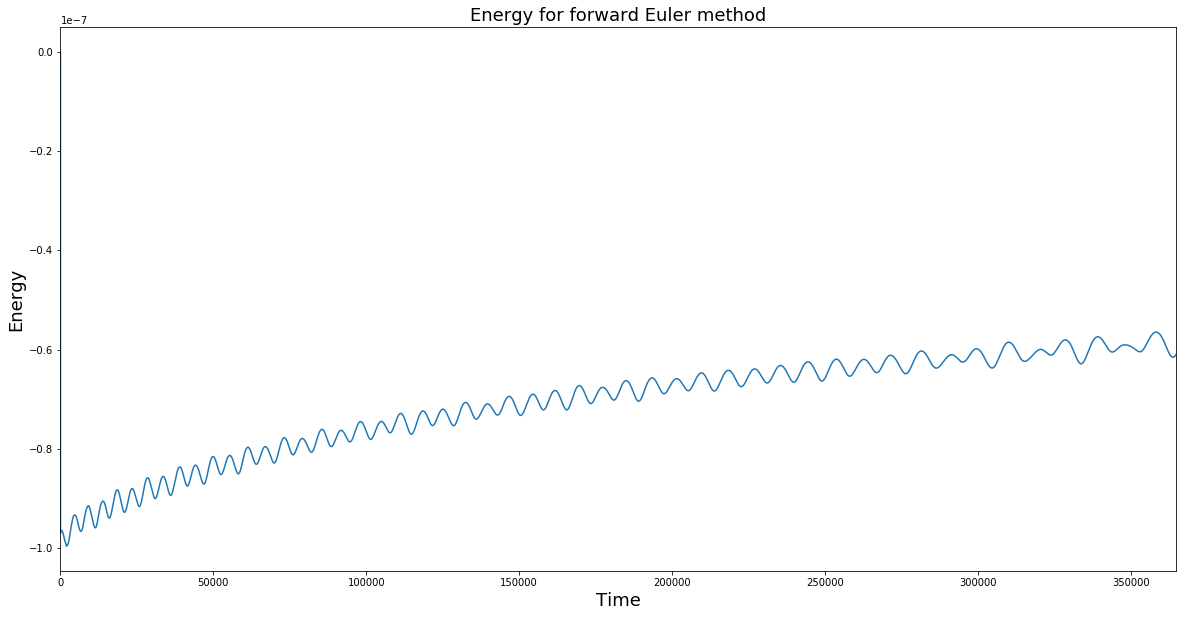

In [25]:
plt.figure(figsize = (20,10))
plt.plot(time,H_Forward_Euler)
plt.xlim(0,365000)
plt.xlabel("Time",fontsize = 18)
plt.ylabel("Energy", fontsize = 18)
plt.title("Energy for forward Euler method",fontsize = 18)
plt.savefig("Energy-Forward_Euler.png")

### 3D plot for planets

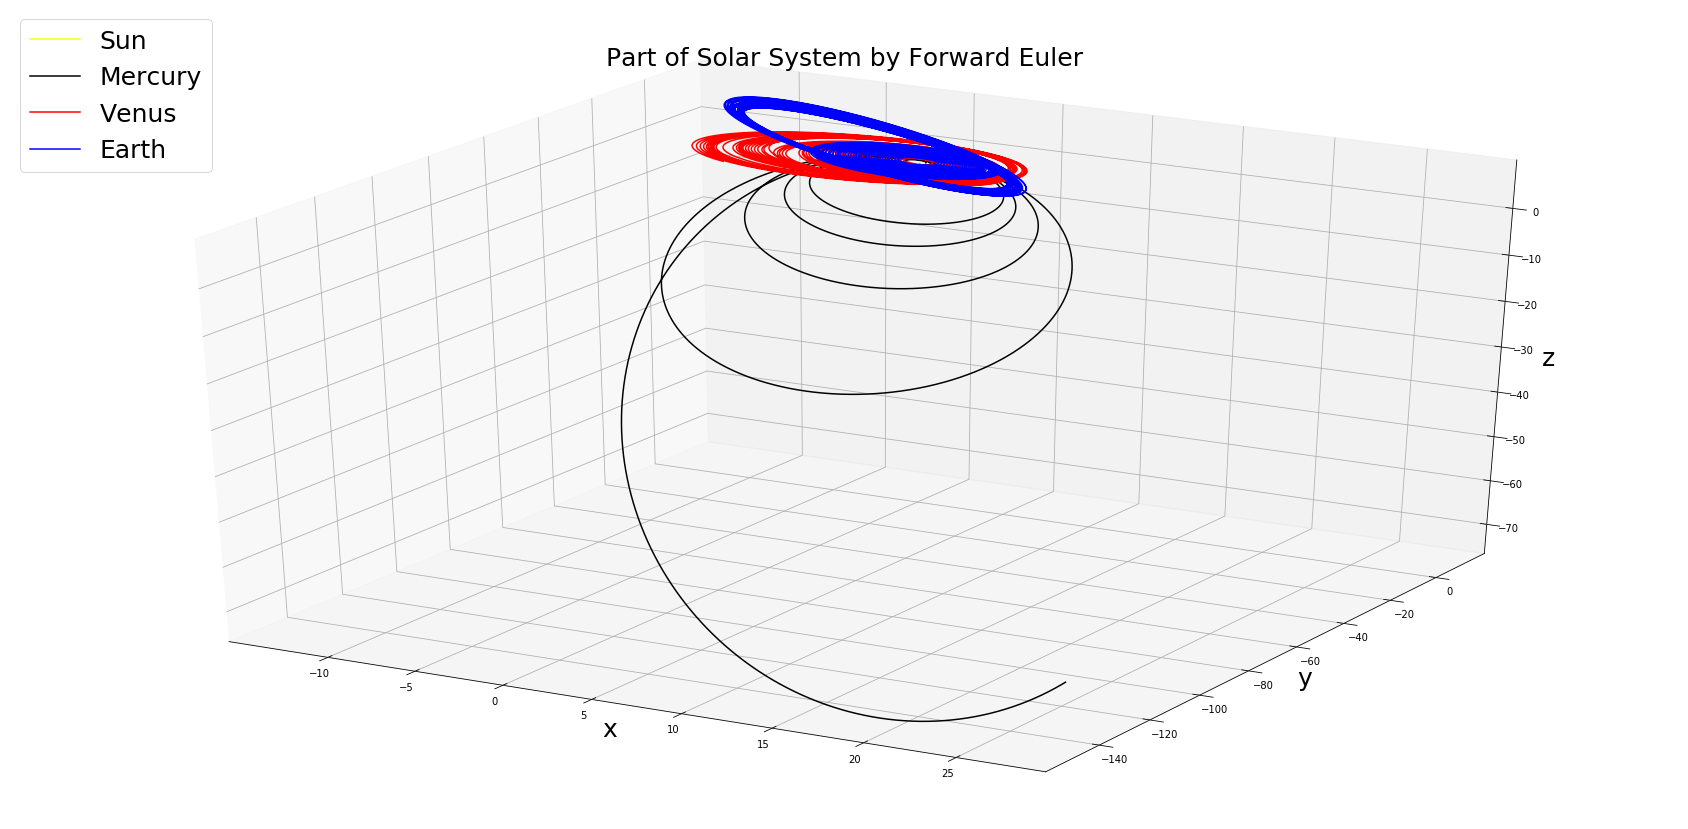

In [26]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(30,15))
ax = plt.axes(projection='3d')
ax.plot3D(xsun,ysun,zsun,label = 'Sun', color = 'yellow')
ax.plot3D(xmer,ymer,zmer,label = 'Mercury', color = 'black')
ax.plot3D(xven,yven,zven,label = 'Venus', color = 'red')
ax.plot3D(xear,year,zear,label = 'Earth', color = 'blue')
#ax.plot3D(xmar,ymar,zmar,label = 'Mars', color = 'brown')
#ax.plot3D(xjup,yjup,zjup,label = 'Jupyter', color = 'green')
#ax.plot3D(xsat,ysat,zsat, label = 'Saturn',color = 'violet')
#ax.plot3D(xura,yura,zura,label = 'Uranus',color = 'pink')
#ax.plot3D(xnep,ynep,znep,label = 'Nepton',color = 'orange')
#ax.plot3D(xplo,yplo,zplo,label = 'Plotu',color = 'gray')
plt.legend(loc = "upper left", fontsize = 25)
ax.set_title("Part of Solar System by Forward Euler",fontsize = 25)
ax.set_xlabel('x',fontsize = 25)
ax.set_ylabel('y',fontsize = 25)
ax.set_zlabel('z',fontsize = 25)
fig.savefig("Forward_Euler_1.png")

Text(0.5, 0, 'z')

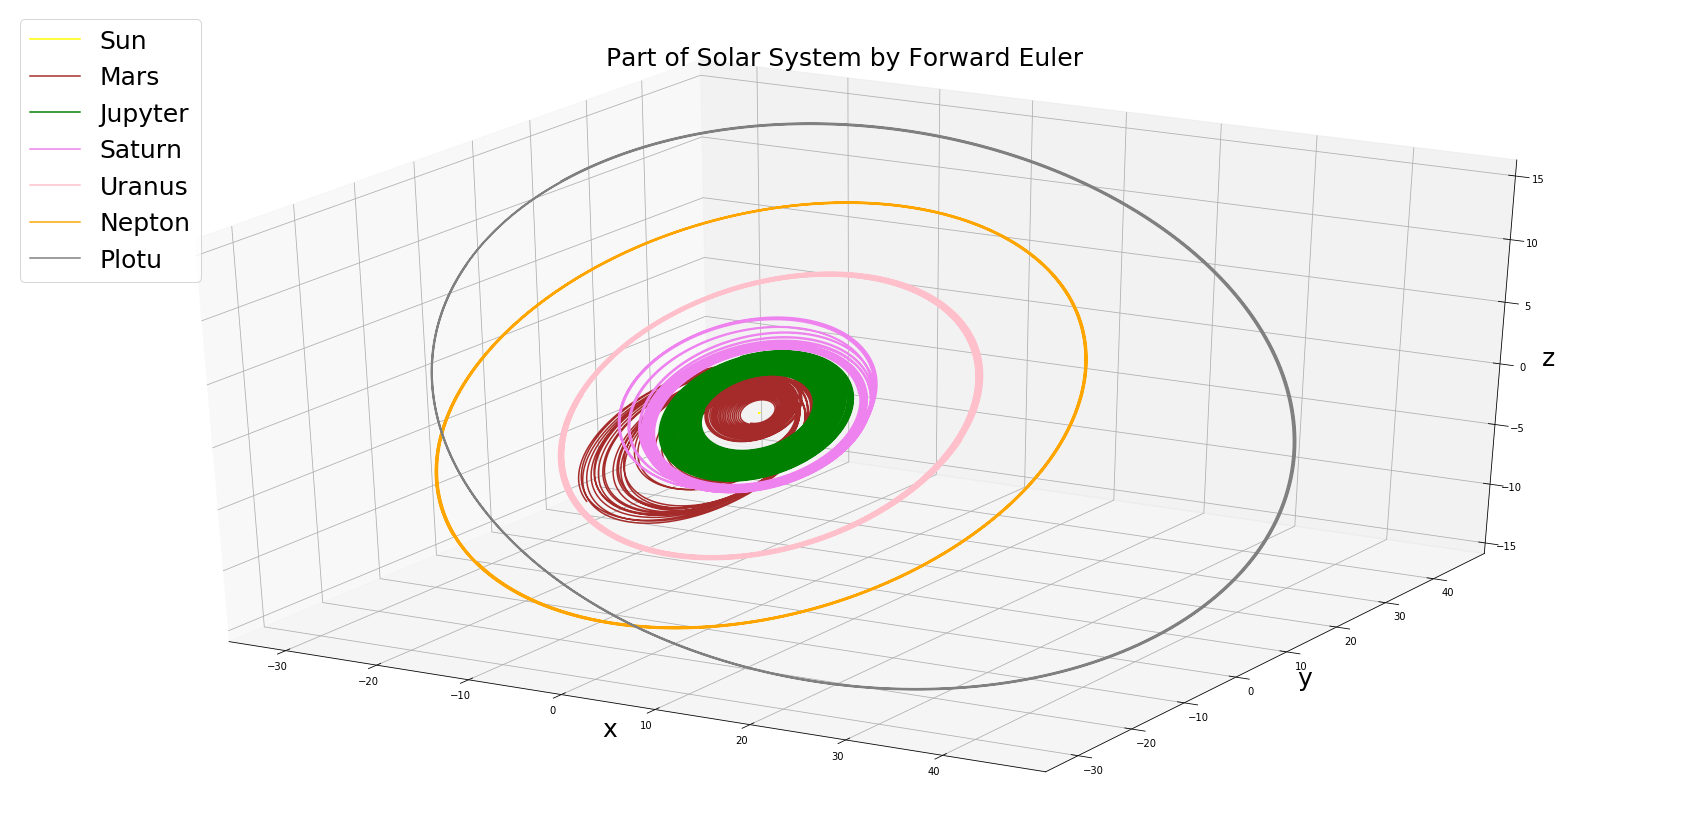

In [27]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(30,15))
ax = plt.axes(projection='3d')
ax.plot3D(xsun,ysun,zsun,label = 'Sun', color = 'yellow')
#ax.plot3D(xmer,ymer,zmer,label = 'Mercury', color = 'black')
#ax.plot3D(xven,yven,zven,label = 'Venus', color = 'red')
#ax.plot3D(xear,year,zear,label = 'Earth', color = 'blue')
ax.plot3D(xmar,ymar,zmar,label = 'Mars', color = 'brown')
ax.plot3D(xjup,yjup,zjup,label = 'Jupyter', color = 'green')
ax.plot3D(xsat,ysat,zsat, label = 'Saturn',color = 'violet')
ax.plot3D(xura,yura,zura,label = 'Uranus',color = 'pink')
ax.plot3D(xnep,ynep,znep,label = 'Nepton',color = 'orange')
ax.plot3D(xplo,yplo,zplo,label = 'Plotu',color = 'gray')
plt.legend(loc = "upper left", fontsize = 25)
ax.set_title("Part of Solar System by Forward Euler",fontsize = 25)
ax.set_xlabel('x',fontsize = 25)
ax.set_ylabel('y',fontsize = 25)
ax.set_zlabel('z',fontsize = 25)

Text(0.5, 0, 'z')

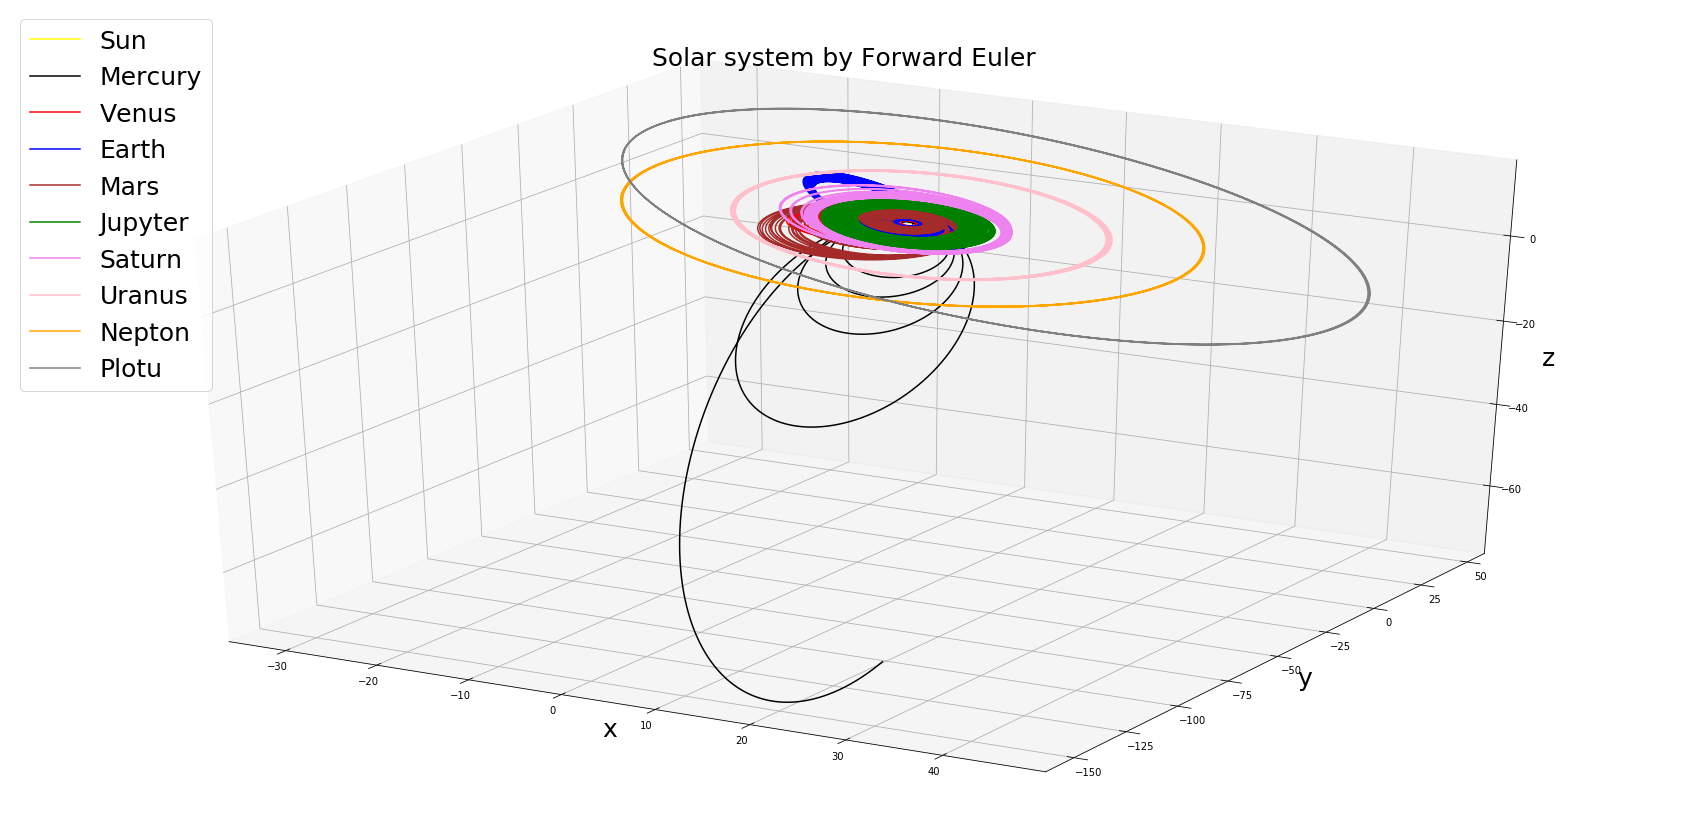

In [28]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(30,15))
ax = plt.axes(projection='3d')
ax.plot3D(xsun,ysun,zsun,label = 'Sun', color = 'yellow')
ax.plot3D(xmer,ymer,zmer,label = 'Mercury', color = 'black')
ax.plot3D(xven,yven,zven,label = 'Venus', color = 'red')
ax.plot3D(xear,year,zear,label = 'Earth', color = 'blue')
ax.plot3D(xmar,ymar,zmar,label = 'Mars', color = 'brown')
ax.plot3D(xjup,yjup,zjup,label = 'Jupyter', color = 'green')
ax.plot3D(xsat,ysat,zsat, label = 'Saturn',color = 'violet')
ax.plot3D(xura,yura,zura,label = 'Uranus',color = 'pink')
ax.plot3D(xnep,ynep,znep,label = 'Nepton',color = 'orange')
ax.plot3D(xplo,yplo,zplo,label = 'Plotu',color = 'gray')
plt.legend(loc = "upper left", fontsize = 25)
ax.set_title("Solar system by Forward Euler",fontsize = 25)
ax.set_xlabel('x',fontsize = 25)
ax.set_ylabel('y',fontsize = 25)
ax.set_zlabel('z',fontsize = 25)